In [1]:
from local_lib.dataset import retreiveDatasetFromCsv

dataset = retreiveDatasetFromCsv()
dataset = dataset.sample(frac=1, random_state=42)

In [2]:
from local_lib.flatten_transformer import FlattenTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split
from local_lib.non_zero_transformer import NonZeroTransformer
from local_lib.mask_transformer import MaskSeuilTransformer
from local_lib.flatten_transformer import FlattenTransformer
from local_lib.dimension_transformer import DimensionTransformer
import numpy as np

# pipeline = Pipeline([
#     ('image_mask', FlattenTransformer()),
# ])

pipeline = Pipeline([
    ('flatten_tr', FlattenTransformer()),
    ('non_zero_tr', NonZeroTransformer()),
    ('mask_tr', MaskSeuilTransformer(strategy="combined")),
    ('dimension_tr', DimensionTransformer())])

# Fit and transform data
X = pipeline.fit_transform(dataset["pixel_value"])
y = np.array(list(dataset["class"]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [3]:
X.shape

(5856, 35860)

**Trying PCA**

In [23]:
import numpy as np
from sklearn.decomposition import PCA

data_test = X.copy()

pca = PCA(n_components=128)
data_test = pca.fit_transform(data_test)

In [24]:
data_test.shape

(5856, 128)

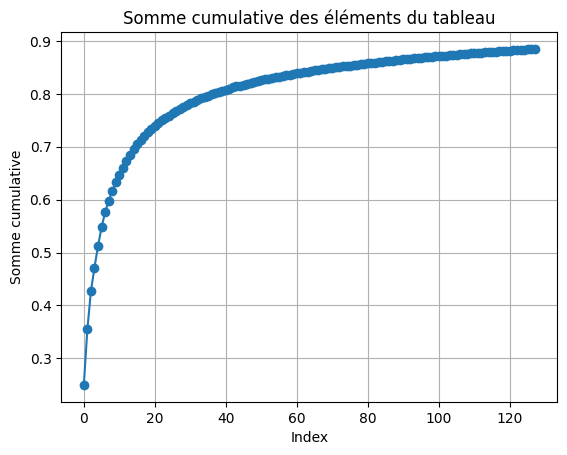

Max value is : 0.89


In [34]:
import matplotlib.pyplot as plt

def cumulative_sum(arr):
    result = []
    current_sum = 0
    for num in arr:
        current_sum += num
        result.append(current_sum)
    return result

cumulative_sums = cumulative_sum(pca.explained_variance_ratio_)

plt.plot(cumulative_sums, marker='o')
plt.title('Somme cumulative des éléments du tableau')
plt.xlabel('Index')
plt.ylabel('Somme cumulative')
plt.grid(True)
plt.show()

print("Max value is : " + str(round(sum(pca.explained_variance_ratio_), 2)))

In [40]:
print("We can express " + str(round(cumulative_sums[50], 2)) + "% of the variance")
print("With only " + str(round(50/X.shape[1], 4)) + "% of the original volume of features")

We can express 0.83% of the variance
With only 0.0014% of the original volume of features


**Variance expression tends to improve slower with oteration**<br>
50 components seems to be the best trade-off between representation and number of components